In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import rcParams
from sklearn.metrics import roc_curve, roc_auc_score
# figure size in inches
rcParams['figure.figsize'] = 25, 10

df = pd.read_csv("compas-scores-two-years.csv")

<AxesSubplot:ylabel='race'>

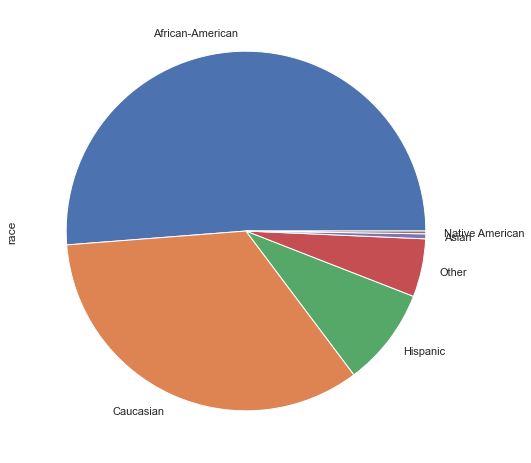

In [10]:
df['race'].value_counts().plot(kind='pie')


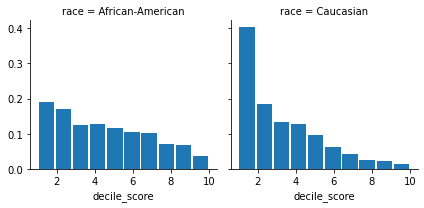

In [5]:
RACE_IN_FOCUS = ['African-American', 'Caucasian']

recid_df = df.loc[df['two_year_recid']==0]
recid_df_race_focused = recid_df[recid_df['race'].isin(RACE_IN_FOCUS)]
g = sns.FacetGrid(recid_df_race_focused, col='race')
g.map(plt.hist, 'decile_score', rwidth=0.9, density = True)

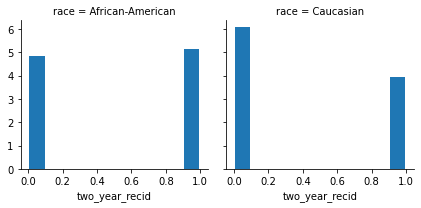

In [6]:
RACE_IN_FOCUS = ['African-American', 'Caucasian']
df_race_focused = df[df['race'].isin(RACE_IN_FOCUS)]
g = sns.FacetGrid(df_race_focused, col='race')
g.map(plt.hist, 'two_year_recid', rwidth=0.9,density = True)

In [7]:
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


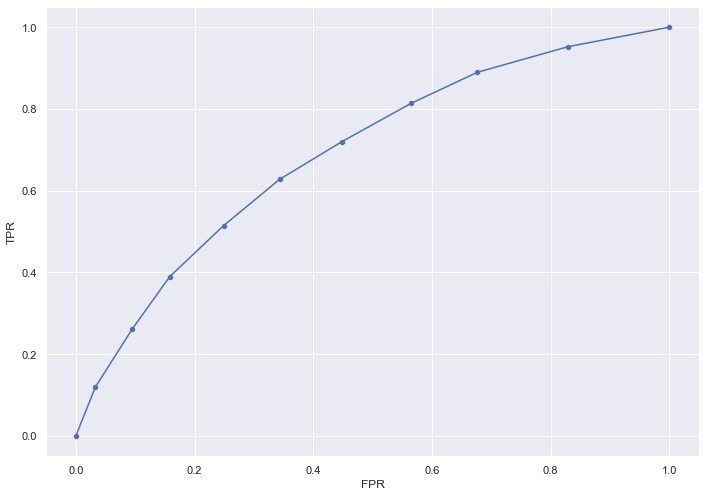

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
black_df=df.loc[df['race']=='African-American']
white_df=df.loc[df['race']=='White']
fpr, tpr, thresholds = roc_curve(black_df['two_year_recid'], black_df['decile_score'])
sns.scatterplot(x=fpr, y=tpr, );
sns.lineplot(x=fpr, y=tpr);
plt.ylabel("TPR");
plt.xlabel("FPR");


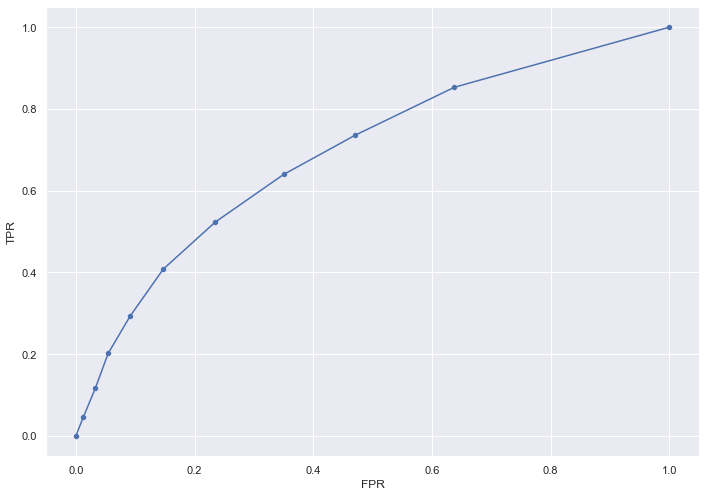

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
black_df=df.loc[df['race']=='African-American']
white_df=df.loc[df['race']=='Caucasian']
fpr, tpr, thresholds = roc_curve(white_df['two_year_recid'], white_df['decile_score'])
sns.scatterplot(x=fpr, y=tpr, );
sns.lineplot(x=fpr, y=tpr);
plt.ylabel("TPR");
plt.xlabel("FPR");

In [23]:
no_recid_df=df.loc[df['two_year_recid']==0]
recid_df=df.loc[df['two_year_recid']==1]

print(no_recid_df['race'].value_counts(),'\n')
print(recid_df['race'].value_counts())


African-American    1795
Caucasian           1488
Hispanic             405
Other                244
Asian                 23
Native American        8
Name: race, dtype: int64 

African-American    1901
Caucasian            966
Hispanic             232
Other                133
Native American       10
Asian                  9
Name: race, dtype: int64


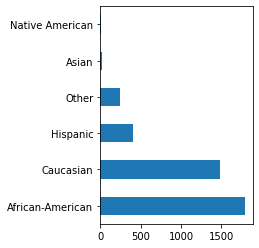

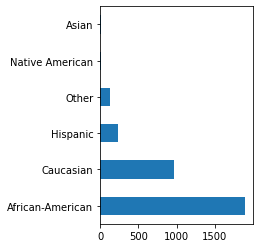

In [24]:
plt.subplot(121)
no_recid_df['race'].value_counts().plot(kind = 'barh')
plt.show()
plt.subplot(122)
recid_df['race'].value_counts().plot(kind = 'barh')
plt.show()

In [19]:
print(no_recid_df['sex'].value_counts(),'\n')
print(recid_df['sex'].value_counts())

Male      3066
Female     897
Name: sex, dtype: int64 

Male      2753
Female     498
Name: sex, dtype: int64


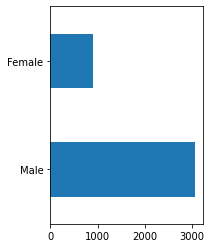

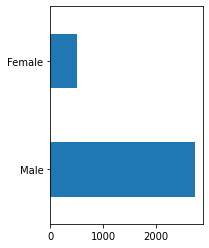

In [20]:
plt.subplot(121)
no_recid_df['sex'].value_counts().plot(kind = 'barh')
plt.show()
plt.subplot(122)
recid_df['sex'].value_counts().plot(kind = 'barh')
plt.show()

In [27]:
for i in no_recid_df['sex'].value_counts():
    no_recid_count+=i

3066
897
